🐟 COMPLETE FISH DATASET EXPLORATION

🔍 DATASET STRUCTURE CHECK
------------------------------
✅ TRAIN: 11 classes, 6,225 images
✅ TEST: 11 classes, 3,187 images
✅ VAL: 11 classes, 1,092 images

📊 CLASS DISTRIBUTION ANALYSIS
------------------------------
TRAIN: Mean=565.9, Min=30, Max=1096
TEST: Mean=289.7, Min=13, Max=520
VAL: Mean=99.3, Min=10, Max=187

📈 CREATING VISUALIZATIONS
------------------------------


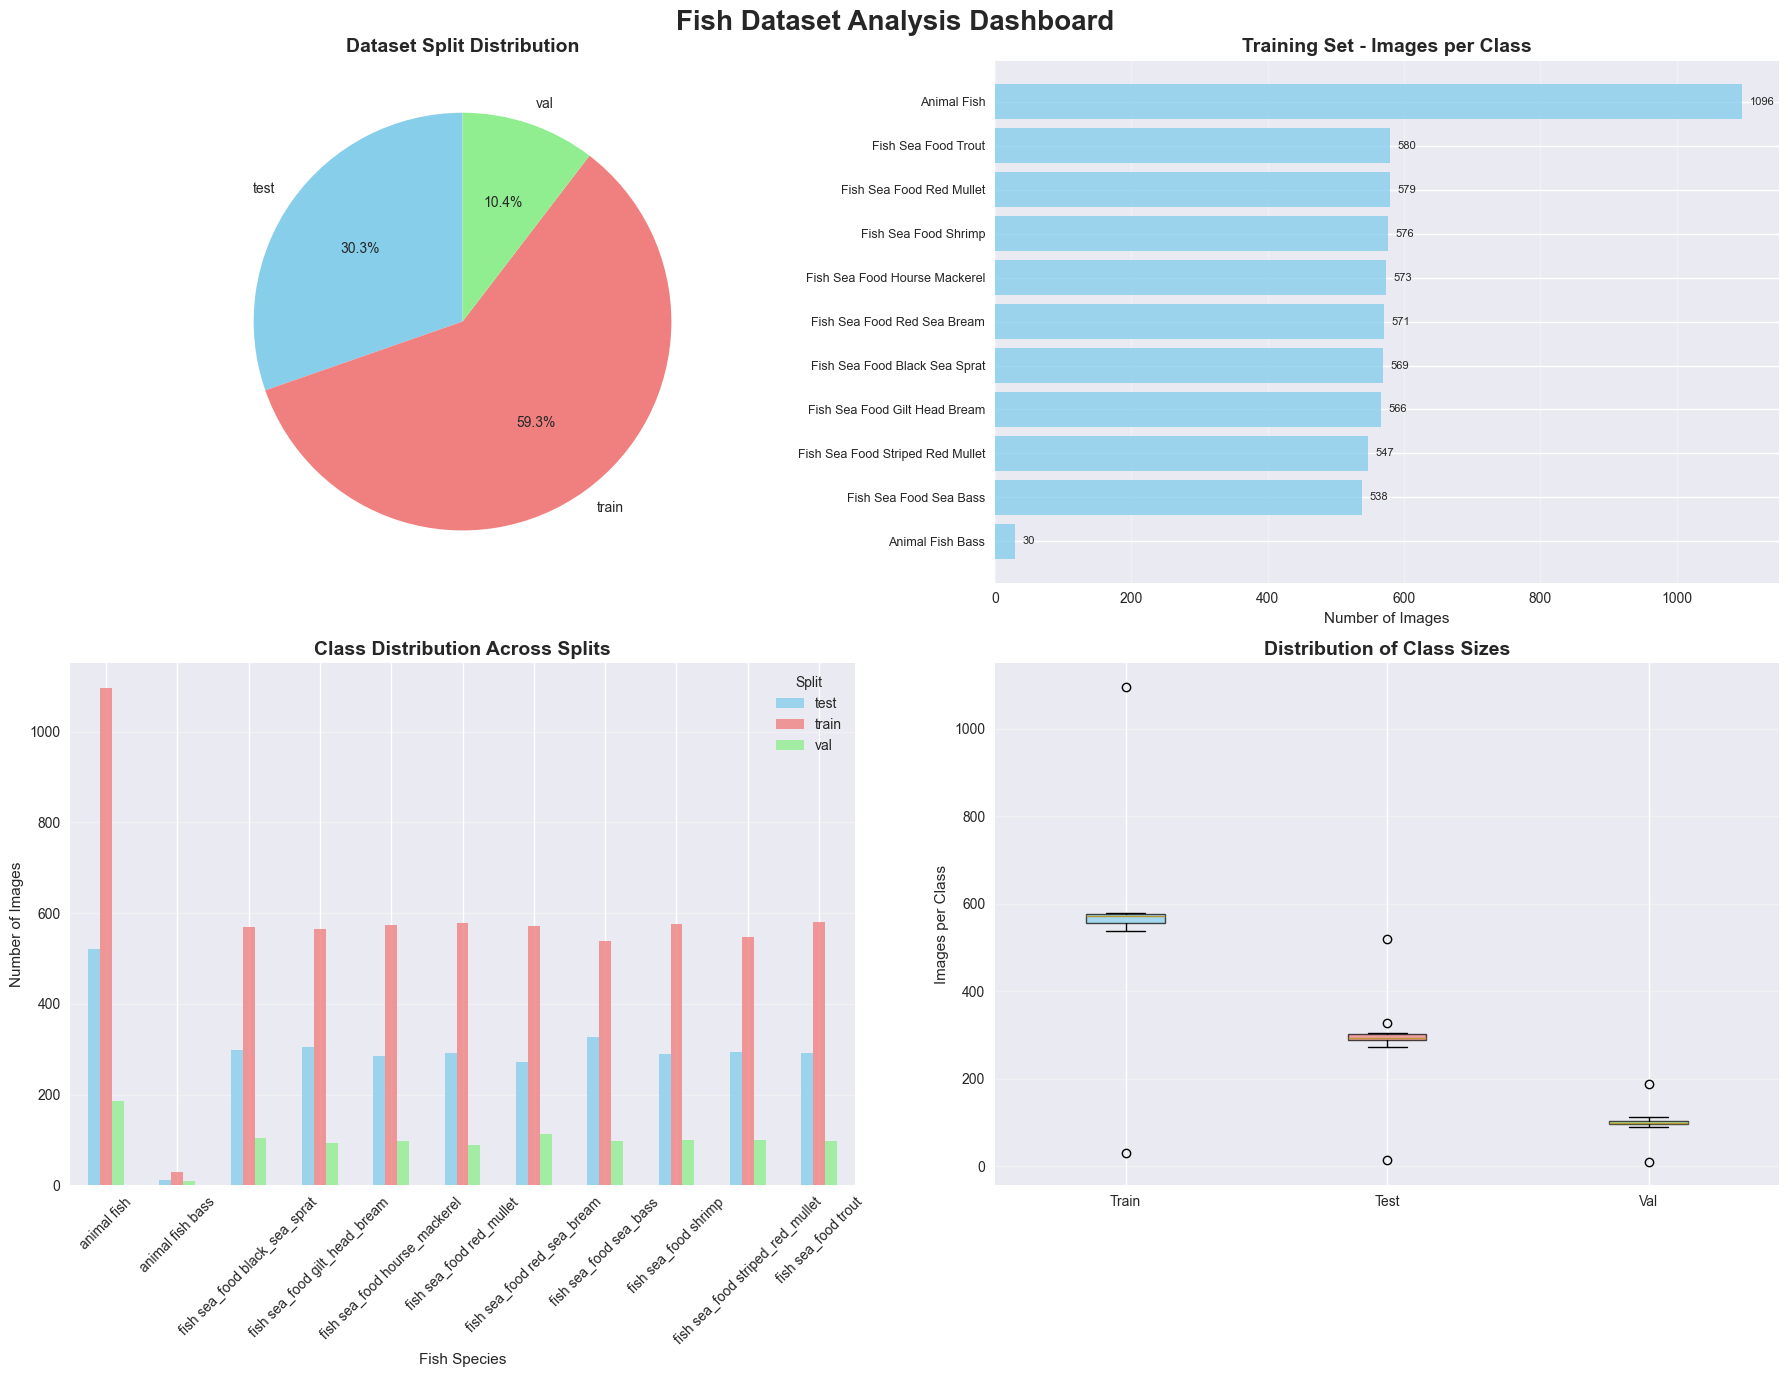


🖼️  DISPLAYING SAMPLE IMAGES
------------------------------


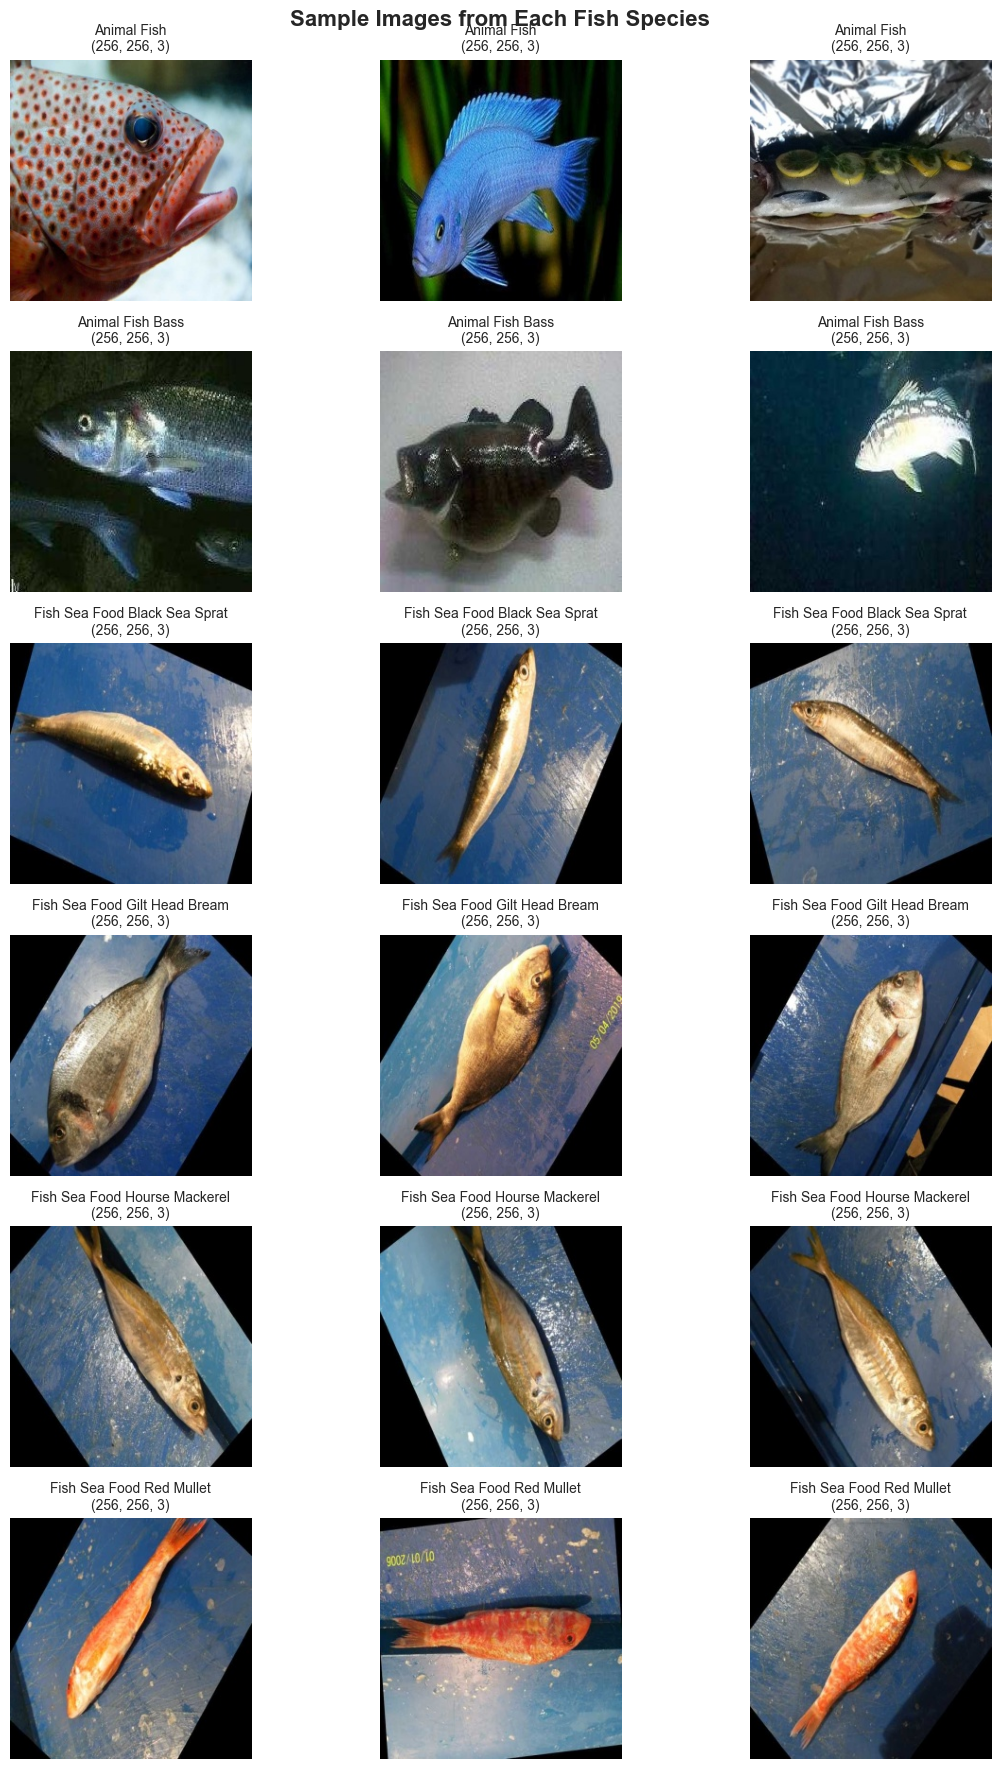


📐 IMAGE PROPERTIES ANALYSIS
------------------------------
📊 PROPERTY STATISTICS (from 96 images):
   Width:  256 - 256 (avg: 256)
   Height: 256 - 256 (avg: 256)
   File Size: 11.6 - 48.5 KB (avg: 26.5)
   Aspect Ratio: 1.00 - 1.00 (avg: 1.00)


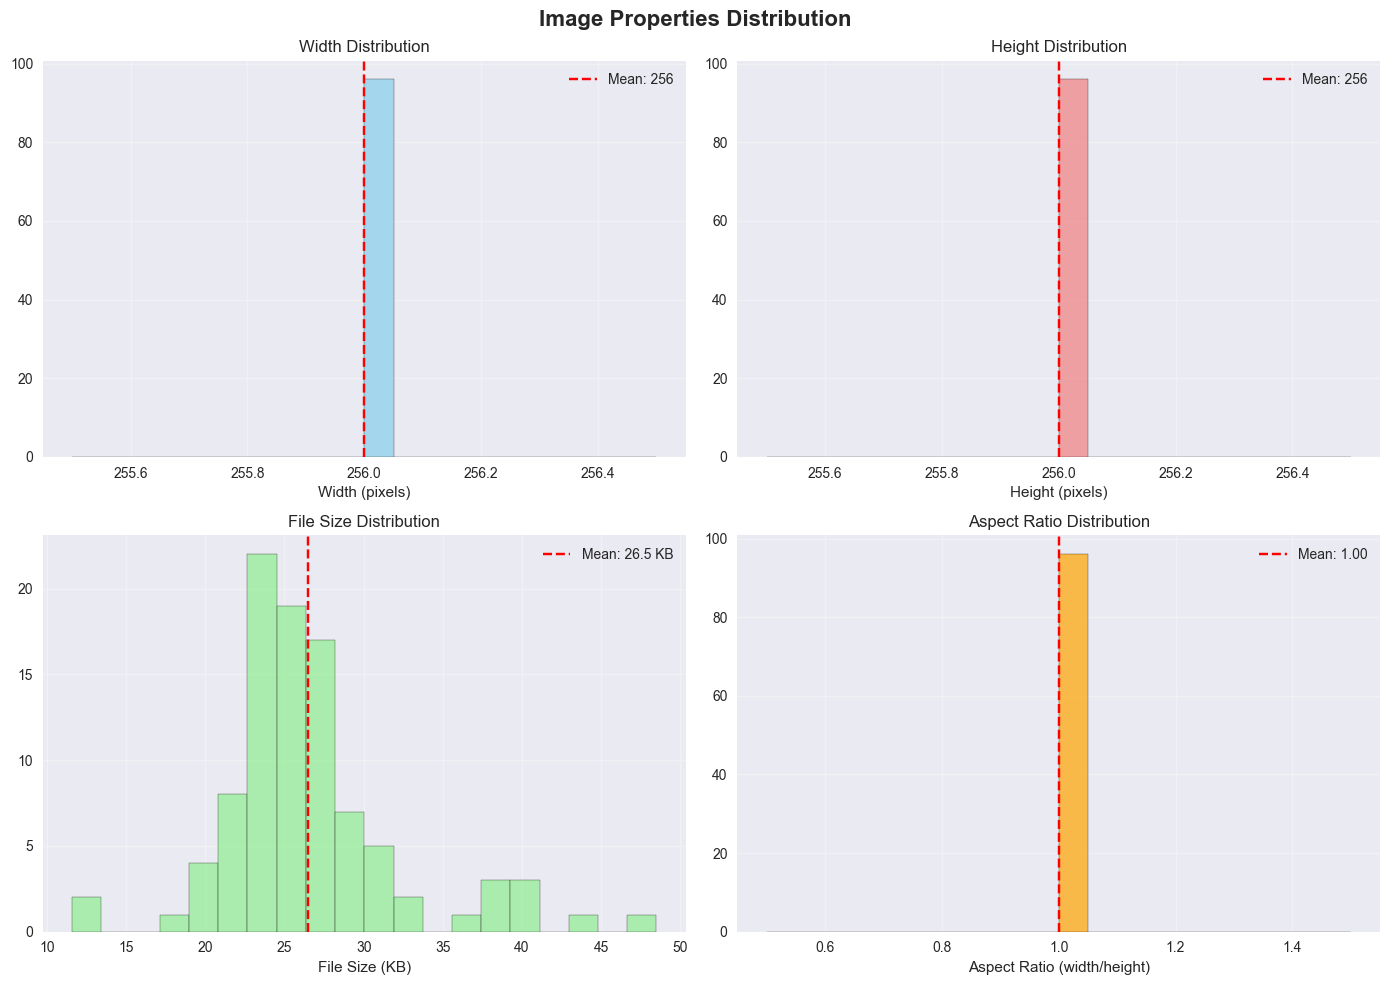


📋 GENERATING SUMMARY REPORT
------------------------------
📊 DATASET SUMMARY:


,Split,Total Images,Number of Classes,Avg Images per Class,Min Images in Class,Max Images in Class
0,Train,6225,11,565.909091,30,1096
1,Test,3187,11,289.727273,13,520
2,Val,1092,11,99.272727,10,187



🎯 KEY INSIGHTS AND RECOMMENDATIONS
📊 DATASET OVERVIEW:
   • Total Images: 10,504
   • Total Classes: 11
   • Average Images per Class: 954.9

🖼️  IMAGE RECOMMENDATIONS:
   • Current average size: 256 x 256
   • Recommended target: 224 x 224 (optimal for transfer learning)

🔄 AUGMENTATION STRATEGY:
   • MODERATE augmentation recommended
   • Use: rotation, flip, zoom, brightness

⚖️  CLASS BALANCE:
   • Imbalance ratio: 36.5:1
   • ⚠️  Significant imbalance - consider class weights

📁 FILES GENERATED:
   • Plots saved in: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\results\plots
   • Reports saved in: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\results\reports

🚀 EXPLORATION COMPLETE! Ready for data preprocessing.
✅ Exploration data stored in 'exploration_summary' variable


In [1]:
# COMPLETE FISH DATASET EXPLORATION - SINGLE CELL VERSION
# Run this cell to perform complete dataset analysis

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration
BASE_DIR = os.path.abspath('..')
DATA_DIR = os.path.join(BASE_DIR, 'data')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
PLOTS_DIR = os.path.join(RESULTS_DIR, 'plots')
REPORTS_DIR = os.path.join(RESULTS_DIR, 'reports')

# Create directories
for directory in [RESULTS_DIR, PLOTS_DIR, REPORTS_DIR]:
    os.makedirs(directory, exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🐟 COMPLETE FISH DATASET EXPLORATION")
print("=" * 60)

# 1. QUICK STRUCTURE CHECK
print("\n🔍 DATASET STRUCTURE CHECK")
print("-" * 30)

if not os.path.exists(DATA_DIR):
    print("❌ Data folder not found!")
    print("Please ensure your dataset is in the 'data/' folder")
else:
    splits = ['train', 'test', 'val']
    data_info = {}
    
    for split in splits:
        split_path = os.path.join(DATA_DIR, split)
        if os.path.exists(split_path):
            classes = [d for d in os.listdir(split_path) 
                      if os.path.isdir(os.path.join(split_path, d))]
            
            class_counts = {}
            split_images = 0
            
            for class_name in classes:
                class_path = os.path.join(split_path, class_name)
                images = [f for f in os.listdir(class_path) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                class_counts[class_name] = len(images)
                split_images += len(images)
            
            data_info[split] = {
                'total_images': split_images,
                'num_classes': len(classes),
                'class_names': classes,
                'class_counts': class_counts
            }
            
            print(f"✅ {split.upper()}: {len(classes)} classes, {split_images:,} images")
        else:
            print(f"⚠️  {split} folder missing")
    
    # 2. ANALYZE CLASS DISTRIBUTION
    print("\n📊 CLASS DISTRIBUTION ANALYSIS")
    print("-" * 30)
    
    if data_info:
        distribution_data = []
        for split, info in data_info.items():
            for class_name, count in info['class_counts'].items():
                distribution_data.append({
                    'split': split,
                    'class': class_name,
                    'count': count
                })
        
        df = pd.DataFrame(distribution_data)
        
        # Print summary stats
        for split in ['train', 'test', 'val']:
            if split in data_info:
                split_data = df[df['split'] == split]
                print(f"{split.upper()}: Mean={split_data['count'].mean():.1f}, "
                      f"Min={split_data['count'].min()}, Max={split_data['count'].max()}")
        
        # 3. CREATE VISUALIZATIONS
        print("\n📈 CREATING VISUALIZATIONS")
        print("-" * 30)
        
        # Main distribution plot
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('Fish Dataset Analysis Dashboard', fontsize=20, fontweight='bold')
        
        # Split distribution pie chart
        split_totals = df.groupby('split')['count'].sum()
        colors = ['skyblue', 'lightcoral', 'lightgreen']
        axes[0, 0].pie(split_totals.values, labels=split_totals.index, autopct='%1.1f%%',
                       colors=colors[:len(split_totals)], startangle=90)
        axes[0, 0].set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')
        
        # Training class distribution
        if 'train' in data_info:
            train_data = df[df['split'] == 'train'].sort_values('count', ascending=True)
            bars = axes[0, 1].barh(range(len(train_data)), train_data['count'], 
                                  color='skyblue', alpha=0.8)
            axes[0, 1].set_yticks(range(len(train_data)))
            axes[0, 1].set_yticklabels([cls.replace('_', ' ').title() for cls in train_data['class']], 
                                      fontsize=9)
            axes[0, 1].set_xlabel('Number of Images')
            axes[0, 1].set_title('Training Set - Images per Class', fontsize=14, fontweight='bold')
            axes[0, 1].grid(axis='x', alpha=0.3)
            
            # Add value labels on bars
            for bar in bars:
                width = bar.get_width()
                axes[0, 1].text(width + max(train_data['count']) * 0.01, bar.get_y() + bar.get_height()/2,
                               f'{int(width)}', ha='left', va='center', fontsize=8)
        
        # Cross-split comparison
        pivot_df = df.pivot(index='class', columns='split', values='count').fillna(0)
        pivot_df.plot(kind='bar', ax=axes[1, 0], color=colors[:len(pivot_df.columns)], alpha=0.8)
        axes[1, 0].set_title('Class Distribution Across Splits', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Fish Species')
        axes[1, 0].set_ylabel('Number of Images')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].legend(title='Split')
        axes[1, 0].grid(axis='y', alpha=0.3)
        
        # Class size distribution boxplot
        split_data = []
        split_labels = []
        for split in ['train', 'test', 'val']:
            if split in df['split'].values:
                split_data.append(df[df['split'] == split]['count'].values)
                split_labels.append(split.title())
        
        bp = axes[1, 1].boxplot(split_data, labels=split_labels, patch_artist=True)
        for patch, color in zip(bp['boxes'], colors[:len(split_labels)]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        axes[1, 1].set_title('Distribution of Class Sizes', fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel('Images per Class')
        axes[1, 1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(PLOTS_DIR, 'complete_distribution_analysis.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        # 4. SAMPLE IMAGES DISPLAY
        print("\n🖼️  DISPLAYING SAMPLE IMAGES")
        print("-" * 30)
        
        train_path = os.path.join(DATA_DIR, 'train')
        if os.path.exists(train_path):
            classes = list(data_info['train']['class_names'])[:6]  # Limit to 6 for display
            
            fig, axes = plt.subplots(len(classes), 3, figsize=(12, 3 * len(classes)))
            fig.suptitle('Sample Images from Each Fish Species', fontsize=16, fontweight='bold')
            
            if len(classes) == 1:
                axes = axes.reshape(1, -1)
            
            for i, class_name in enumerate(classes):
                class_path = os.path.join(train_path, class_name)
                images = [f for f in os.listdir(class_path) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                
                # Sample 3 random images
                sample_images = np.random.choice(images, min(len(images), 3), replace=False)
                
                for j, img_name in enumerate(sample_images):
                    img_path = os.path.join(class_path, img_name)
                    
                    try:
                        img = cv2.imread(img_path)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        
                        if len(classes) == 1:
                            ax = axes[j]
                        else:
                            ax = axes[i, j]
                            
                        ax.imshow(img)
                        ax.set_title(f"{class_name.replace('_', ' ').title()}\n{img.shape}", fontsize=10)
                        ax.axis('off')
                        
                    except Exception as e:
                        if len(classes) == 1:
                            ax = axes[j]
                        else:
                            ax = axes[i, j]
                        ax.text(0.5, 0.5, f"Error loading\n{img_name}", 
                               ha='center', va='center', transform=ax.transAxes)
                        ax.axis('off')
                
                # Fill remaining slots
                for j in range(len(sample_images), 3):
                    if len(classes) == 1:
                        axes[j].axis('off')
                    else:
                        axes[i, j].axis('off')
            
            plt.tight_layout()
            plt.savefig(os.path.join(PLOTS_DIR, 'sample_images_display.png'), 
                       dpi=300, bbox_inches='tight')
            plt.show()
        
        # 5. IMAGE PROPERTIES ANALYSIS
        print("\n📐 IMAGE PROPERTIES ANALYSIS")
        print("-" * 30)
        
        # Sample images for property analysis
        sample_images = []
        sample_size = 100
        
        for class_name in classes:
            class_path = os.path.join(train_path, class_name)
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            sample_count = min(len(images), max(1, sample_size // len(classes)))
            if len(images) > 0:
                sampled = np.random.choice(images, sample_count, replace=False)
                for img_name in sampled:
                    sample_images.append(os.path.join(class_path, img_name))
        
        # Analyze properties
        image_props = {'widths': [], 'heights': [], 'file_sizes': [], 'aspect_ratios': []}
        
        for img_path in sample_images[:sample_size]:
            try:
                file_size = os.path.getsize(img_path) / 1024  # KB
                image_props['file_sizes'].append(file_size)
                
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_props['widths'].append(width)
                    image_props['heights'].append(height)
                    image_props['aspect_ratios'].append(width / height)
            except:
                continue
        
        # Display property statistics
        print(f"📊 PROPERTY STATISTICS (from {len(image_props['widths'])} images):")
        print(f"   Width:  {min(image_props['widths'])} - {max(image_props['widths'])} (avg: {np.mean(image_props['widths']):.0f})")
        print(f"   Height: {min(image_props['heights'])} - {max(image_props['heights'])} (avg: {np.mean(image_props['heights']):.0f})")
        print(f"   File Size: {min(image_props['file_sizes']):.1f} - {max(image_props['file_sizes']):.1f} KB (avg: {np.mean(image_props['file_sizes']):.1f})")
        print(f"   Aspect Ratio: {min(image_props['aspect_ratios']):.2f} - {max(image_props['aspect_ratios']):.2f} (avg: {np.mean(image_props['aspect_ratios']):.2f})")
        
        # Visualize properties
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Image Properties Distribution', fontsize=16, fontweight='bold')
        
        # Width distribution
        axes[0, 0].hist(image_props['widths'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Width Distribution')
        axes[0, 0].set_xlabel('Width (pixels)')
        axes[0, 0].axvline(np.mean(image_props['widths']), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(image_props["widths"]):.0f}')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        # Height distribution
        axes[0, 1].hist(image_props['heights'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[0, 1].set_title('Height Distribution')
        axes[0, 1].set_xlabel('Height (pixels)')
        axes[0, 1].axvline(np.mean(image_props['heights']), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(image_props["heights"]):.0f}')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
        
        # File size distribution
        axes[1, 0].hist(image_props['file_sizes'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1, 0].set_title('File Size Distribution')
        axes[1, 0].set_xlabel('File Size (KB)')
        axes[1, 0].axvline(np.mean(image_props['file_sizes']), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(image_props["file_sizes"]):.1f} KB')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
        
        # Aspect ratio distribution
        axes[1, 1].hist(image_props['aspect_ratios'], bins=20, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 1].set_title('Aspect Ratio Distribution')
        axes[1, 1].set_xlabel('Aspect Ratio (width/height)')
        axes[1, 1].axvline(np.mean(image_props['aspect_ratios']), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(image_props["aspect_ratios"]):.2f}')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(PLOTS_DIR, 'image_properties_complete.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        # 6. GENERATE SUMMARY REPORT
        print("\n📋 GENERATING SUMMARY REPORT")
        print("-" * 30)
        
        # Create summary DataFrame
        summary_data = []
        for split in ['train', 'test', 'val']:
            if split in data_info:
                info = data_info[split]
                summary_data.append({
                    'Split': split.title(),
                    'Total Images': info['total_images'],
                    'Number of Classes': info['num_classes'],
                    'Avg Images per Class': np.mean(list(info['class_counts'].values())),
                    'Min Images in Class': min(info['class_counts'].values()),
                    'Max Images in Class': max(info['class_counts'].values())
                })
        
        summary_df = pd.DataFrame(summary_data)
        
        print("📊 DATASET SUMMARY:")
        display(summary_df)
        
        # Save reports
        summary_df.to_csv(os.path.join(REPORTS_DIR, 'dataset_summary.csv'), index=False)
        
        # Create detailed class info
        class_details = []
        for split in ['train', 'test', 'val']:
            if split in data_info:
                for class_name, count in data_info[split]['class_counts'].items():
                    class_details.append({
                        'Split': split,
                        'Class': class_name,
                        'Image Count': count
                    })
        
        class_df = pd.DataFrame(class_details)
        class_df.to_csv(os.path.join(REPORTS_DIR, 'class_details.csv'), index=False)
        
        # 7. KEY INSIGHTS
        print(f"\n🎯 KEY INSIGHTS AND RECOMMENDATIONS")
        print("=" * 50)
        
        total_images = sum([info['total_images'] for info in data_info.values()])
        total_classes = data_info['train']['num_classes'] if 'train' in data_info else 0
        
        print(f"📊 DATASET OVERVIEW:")
        print(f"   • Total Images: {total_images:,}")
        print(f"   • Total Classes: {total_classes}")
        print(f"   • Average Images per Class: {total_images/total_classes:.1f}")
        
        print(f"\n🖼️  IMAGE RECOMMENDATIONS:")
        avg_width = np.mean(image_props['widths'])
        avg_height = np.mean(image_props['heights'])
        print(f"   • Current average size: {avg_width:.0f} x {avg_height:.0f}")
        print(f"   • Recommended target: 224 x 224 (optimal for transfer learning)")
        
        print(f"\n🔄 AUGMENTATION STRATEGY:")
        if total_images < 5000:
            print("   • HIGH augmentation needed (small dataset)")
            print("   • Use: rotation, flip, zoom, brightness, contrast, shear")
        elif total_images < 15000:
            print("   • MODERATE augmentation recommended")
            print("   • Use: rotation, flip, zoom, brightness")
        else:
            print("   • LIGHT augmentation sufficient")
            print("   • Use: flip, small rotation")
        
        # Class balance check
        if 'train' in data_info:
            class_counts = list(data_info['train']['class_counts'].values())
            imbalance_ratio = max(class_counts) / min(class_counts)
            
            print(f"\n⚖️  CLASS BALANCE:")
            print(f"   • Imbalance ratio: {imbalance_ratio:.1f}:1")
            if imbalance_ratio > 3:
                print("   • ⚠️  Significant imbalance - consider class weights")
            else:
                print("   • ✅ Reasonably balanced dataset")
        
        print(f"\n📁 FILES GENERATED:")
        print(f"   • Plots saved in: {PLOTS_DIR}")
        print(f"   • Reports saved in: {REPORTS_DIR}")
        
        print(f"\n🚀 EXPLORATION COMPLETE! Ready for data preprocessing.")
        
        # Return key variables for next steps
        globals()['exploration_summary'] = {
            'data_info': data_info,
            'summary_df': summary_df,
            'class_df': class_df,
            'image_properties': image_props,
            'total_images': total_images,
            'total_classes': total_classes,
            'recommended_size': (224, 224),
            'imbalance_ratio': imbalance_ratio if 'train' in data_info else 1.0
        }
        
        print("✅ Exploration data stored in 'exploration_summary' variable")